In [18]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'SyntaxError'>: invalid syntax (<ipython-input-18-03b1047f31ca>, line 3)

In [10]:
# Load the dataset
df = pd.read_csv("UCI_Credit_Card.csv")  # Rename if your file is different
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [11]:
print(df.shape)  # Rows and columns

(30000, 25)


In [12]:
print(df.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
print(df.describe())  # Summary stats

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

<Axes: xlabel='default.payment.next.month'>

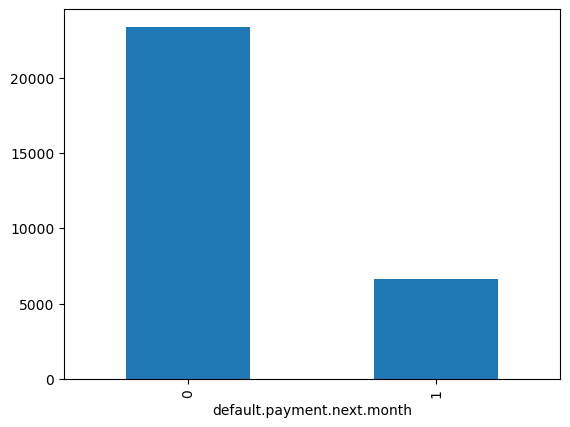

In [14]:
df['default.payment.next.month'].value_counts().plot(kind='bar')
# If imbalanced (e.g., 80% "0"), we'll handle it later.

In [ ]:
import seaborn as sns
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)
# Lower credit limits might correlate with defaults.

In [20]:
df = df.drop('ID', axis=1)  # Client ID is useless for prediction

In [21]:
print(df.isnull().sum())  # Check for missing data
# If missing, use: df.fillna(df.mean(), inplace=True)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [22]:
# Example: 'SEX', 'EDUCATION', 'MARRIAGE' are categorical
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('default.payment.next.month', axis=1)  # Features
y = df['default.payment.next.month']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')  # Handles imbalance
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [27]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

In [28]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.37      0.64      0.47      1960

    accuracy                           0.69      9000
   macro avg       0.62      0.67      0.63      9000
weighted avg       0.77      0.69      0.71      9000

ROC-AUC: 0.7251584241651206


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)  # No scaling needed for trees
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.63      0.33      0.43      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



<Axes: >

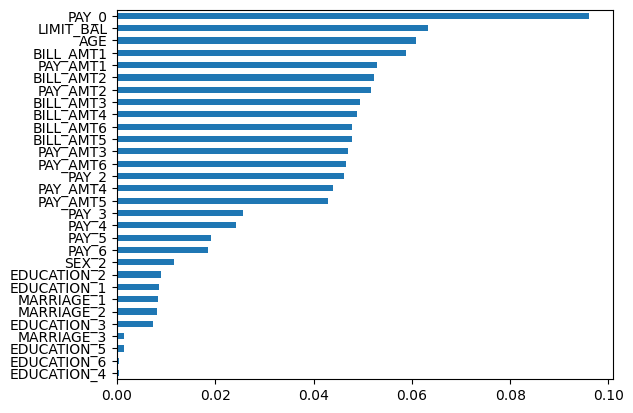

In [30]:
importances = rf.feature_importances_
pd.Series(importances, index=X.columns).sort_values().plot(kind='barh')